# Tests for conditional independance (Frequentist)


For a linear structural model, $Y = \alpha X + \beta_1 Z_1 + ... + \beta_i Z_i$ for each $Z_i$ in the set of variables Z that D-separate X and Y. (ref: Ch. 5, Casuality by Pearl)

If $\alpha = 0$, this implies that Y is independant of X, conditioned on Z. 

### Algorithm (single door criterion):

1. Given a graph with edge between X and Y removed (direct effect), find a set of variables {Z} that D-separate X and Y.
2. regress Y on X and {Z}
3. take the $\alpha$ parameter for X as the causal coefficient in the linear structural causal model.
4. repeat for each edge in the graph

This (or similar algorithm) has been implemented already: https://github.com/y0-causal-inference/eliater/blob/linear-regression/src/eliater/regression.py 

Now we just need to implement it for our models and data

In [2]:
# !pip install matplotlib
# !pip install statsmodels
!pip install git+https://github.com/y0-causal-inference/eliater.git@linear-regression




#import numpy as np 
#import networkx as nx
#import matplotlib.pyplot as plt
#import statsmodels.api as sm



  Cloning https://github.com/y0-causal-inference/eliater.git (to revision linear-regression) to /private/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/pip-req-build-x85uqzna
  Running command git clone --filter=blob:none --quiet https://github.com/y0-causal-inference/eliater.git /private/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/pip-req-build-x85uqzna
  Running command git checkout -b linear-regression --track origin/linear-regression
  Switched to a new branch 'linear-regression'
  branch 'linear-regression' set up to track 'origin/linear-regression'.
  Resolved https://github.com/y0-causal-inference/eliater.git to commit 9365c94f168550e452040e76c4d9d0999b8a168c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of eliater to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions tha

### Simple 3 variable linear model: 

Directed graph: 

X-->Y<--Z<--X

Model equations:

$Y = \beta_{xy} X + \beta_{zy} Z + \epsilon_{y}$

$Z = \beta_{xz} X + \epsilon_{z}$

For simulations:

Let $\epsilon$ ~ U(0,0.5), X ~ U(0,1), $\beta_{xy}=2$, $\beta_{zy}=-1$, $\beta_{xz}=1.5$

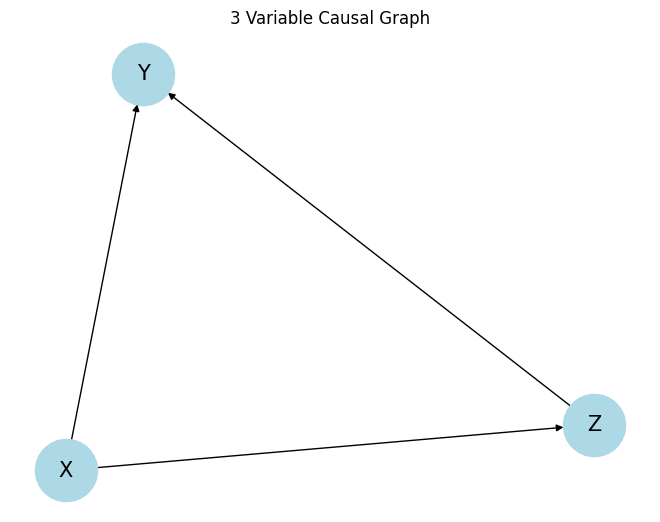

In [21]:
# Creating the causal graph
G0 = nx.DiGraph()
G0.add_edges_from([('X', 'Y'), ('Z', 'Y'), ('X', 'Z')])

# Visualizing the graph
pos = nx.spring_layout(G0)
nx.draw(G0, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15)
plt.title("3 Variable Causal Graph")
plt.show()

In [1]:
# # Generate synthetic data, do linear regression, and plot it

# # Set a random seed for reproducibility
# np.random.seed(0)

# # Generate synthetic data
# n = 10000
# X = np.random.rand(n)
# epsilon_Z = np.random.randn(n) * 0.5  # smaller variance for the error term
# epsilon_Y = np.random.randn(n) * 0.5

# # Coefficients for the synthetic model
# beta_xz = 1.5
# beta_xy = 2.0
# beta_zy = -1.0

# # Generating Z and Y based on the model
# Z = beta_xz * X + epsilon_Z
# Y = beta_xy * X + beta_zy * Z + epsilon_Y

# # Perform linear regression to estimate the beta values

# # Prepare the data for regression
# XZ = np.column_stack((X, Z))
# XZ_with_intercept = sm.add_constant(XZ)  # add an intercept term

# # Perform linear regression for Y on X and Z
# model_Y = sm.OLS(Y, XZ_with_intercept).fit()

# # Extracting estimated coefficients
# estimated_beta_xy = model_Y.params[1]  # Coefficient for X
# estimated_beta_zy = model_Y.params[2]  # Coefficient for Z

# # The coefficient for X in the Z model needs to be estimated separately
# model_Z = sm.OLS(Z, sm.add_constant(X)).fit()
# estimated_beta_xz = model_Z.params[1]  # Coefficient for X in Z model

# # Displaying the estimated coefficients and 95% confidence interval
# estimated_beta_xy, estimated_beta_zy, estimated_beta_xz
# print(f'estimates: {estimated_beta_xy}, {estimated_beta_zy}, {estimated_beta_xz}')
# print(f'true values: {beta_xy}, {beta_zy}, {beta_xz}')
# conf_int_Y = model_Y.conf_int(alpha=0.05)  # 95% confidence interval
# print("Confidence Intervals for Y model:\n", conf_int_Y[1:3])
# conf_int_Z = model_Z.conf_int(alpha=0.05)  # 95% confidence interval
# print("\nConfidence Intervals for Z model:\n", conf_int_Z[1])

# # Plotting the data
# plt.figure(figsize=(12, 6))

# # Scatter plot for X and Y
# plt.subplot(1, 3, 1)
# plt.scatter(X, Y, alpha=0.5)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter plot of Y vs X')

# # Scatter plot for Z and Y
# plt.subplot(1, 3, 2)
# plt.scatter(Z, Y, alpha=0.5)
# plt.xlabel('Z')
# plt.ylabel('Y')
# plt.title('Scatter plot of Y vs Z')

# # Scatter plot for X and Z
# plt.subplot(1, 3, 3)
# plt.scatter(X, Z, alpha=0.5, color='orange')
# plt.xlabel('X')
# plt.ylabel('Z')
# plt.title('Scatter plot of Z vs X')

# plt.tight_layout()
# plt.show()

In [27]:
# from Jeremy
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr
from typing import List

def get_partial_regression_coefficient(X: List, Y: List, Z: List = []) -> float:
    """
    Calculate the partial regression coefficient between X and Y, controlling for variables in Z.
    
    :param X: List of values for the independent variable
    :param Y: List of values for the dependent variable
    :param Z: List of lists, where each inner list is a control variable
    :return: Partial regression coefficient
    """
    X = np.array(X)
    Y = np.array(Y)
    Z = np.column_stack(Z) if Z else np.empty((len(X), 0))

    # Add a constant to Z for the regression intercept
    Z = sm.add_constant(Z)

    # Regress Y on Z and get residuals
    model_Y = sm.OLS(Y, Z).fit()
    residual_Y = model_Y.resid

    # Regress X on Z and get residuals
    model_X = sm.OLS(X, Z).fit()
    residual_X = model_X.resid

    # Calculate the partial correlation coefficient
    r_XY_Z, _ = pearsonr(residual_X, residual_Y)

    return r_XY_Z

# Example usage
# X_data = [list of X values]
# Y_data = [list of Y values]
# Z_data = [[list of Z1 values], [list of Z2 values], ...]
# result = get_partial_regression_coefficient(X_data, Y_data, Z_data)

# A Bayesian approach to casual inference

Use a heirarchical Bayesian model:
1. observed model
2. conditioned (intervention) model

These models are coupled and share nuisance parameters and confounders. From the posterior we can get the credible region of the confounding variables (with an intervention) to check for independance/dependance. 

Example:

UPDATE and write code example


X -> Y:   Y = f(X) + epsilon

Y' = f(X')  + epsilon
Y = f(X) + epsilon

X = epsilon_x
X' = 3

X -> Z -> Y

f(X) = a*X

a ~ Normal(0, 1)

U_xy ~ Laplace(0)
 X = epsilon_x + U_xy
Y = f(X) + epsilon_y + U_xy

X, Y, Z ~ true DGP

X -> Z -> Y <- U -> X

X ~ epsilon_x + U_xy

Z ~ g(X) + epsilon_z 
Y ~ f(Z) + epsilon_y + U_xy

U_xy ~ Laplace(0)
epsilon_x, y, z ~ Normal(0,1)

g(X) = a*X,   a ~ Normal(0, 1)
f(Z)  = b*Z,   b ~ Normal(0, 1)

X' = 3
Z' = g(X') + epsilon_z
Y' = f(Z') + epsilon_y + U_xy

X' = X.copy()
do(X', {X' = 3})

Z' = Z.copy()


### Meenu's model

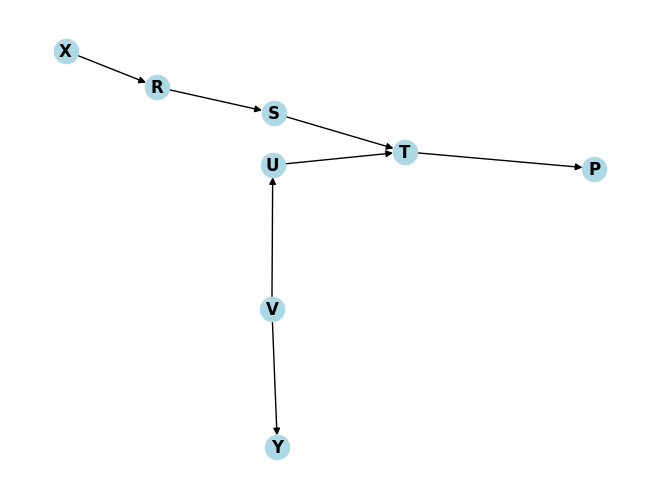

In [11]:
# graph: X -> R -> S -> T <- U <- V -> Y, T -> P
# graph edges:
# X -> R
# R -> S
# S -> T
# U -> T
# V -> U
# V -> Y
# T -> P

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edge('X', 'R')
G.add_edge('R', 'S')
G.add_edge('S', 'T')
G.add_edge('U', 'T')
G.add_edge('V', 'U')
G.add_edge('V', 'Y')
G.add_edge('T', 'P')

# Define the layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold')
plt.show()

In [ ]:
# which data to generate? 
# software tools for regression analysis